# Machine Learning: assignment 2 (Support Vector Machine)

Patrik Amethier & Clément Gousseau

In [669]:
import numpy, random, math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## Data

In [670]:
numpy.random.seed(100)

classA=numpy.concatenate((numpy.random.randn(10,2)*0.4+[1.5,0.5],numpy.random.randn(10,2)*0.4+[-1.5,0.5]))
classB=numpy.random.randn(20,2)*0.4+[0,-0.5]


inputs=numpy.concatenate((classA,classB))
target=numpy.concatenate((numpy.ones(classA.shape[0]),-numpy.ones(classB.shape[0])))

N=inputs.shape[0]

permute=list(range(N))
random.shuffle(permute)
inputs=inputs[permute,:]
target=target[permute]

## Implementation

In [671]:
numpy.size(inputs)

## Kernels
def kernellin(a,b):
    return numpy.dot(a,b)

def kernelpoly(a,b):
    return (numpy.dot(a,b)+1)**3
    
def kernelradial(a,b,sigma):
    return math.exp(-numpy.dot(a-b,a-b)/(2*sigma**2))

## Objective function
P=numpy.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        P[i][j]=target[i]*target[j]*kernellin(inputs[:][i],inputs[:][j])

def objective(alpha):
    sum1=0
    sum2=0
    for i in range(0,N):
        for j in range (0,N):
            sum1=sum1+alpha[i]*alpha[j]*P[i][j]
        sum2=sum2+alpha[i]
    return 0.5*sum1-sum2

def zerofun(alpha):
    return numpy.dot(alpha,target)

## Minimize
C=10000
start=numpy.zeros(N)
ret=minimize(objective,start,bounds=[(0,C) for b in range(N)],constraints={'type':'eq','fun':zerofun})
alpha=ret['x']

## Take the non zero alphas
nonzeroalpha=[(x>10**-5)*x for x in alpha]

## Finding a support vector
supportIndex=0
for i in range(0,N):
    if (nonzeroalpha[i]>0):
        supportIndex=i
        break

## Compute b
b=0
for i in range(0,N):
    b=b+nonzeroalpha[i]*target[i]*kernellin(inputs[supportIndex][:],inputs[i][:])
b=b-target[supportIndex]

## Compute indicator
def indicator(sx,sy):
    s=[sx,sy]
    sum=0
    for i in range(0,N):
        sum=sum+nonzeroalpha[i]*target[i]*kernellin(s,inputs[i][:])
    sum=sum-b
    return sum

## Plotting the decision boundary

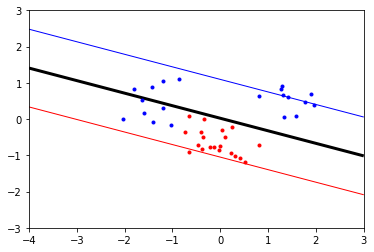

In [672]:
plt.plot([p[0] for p in classA ],[p[1] for p in classA ],'b.')
plt.plot( [p[0] for p in classB ] , [p[1] for p in classB ] , 'r.' )

xgrid=numpy.linspace(-4,3)
ygrid=numpy.linspace(-3,3)
grid=numpy.array([[indicator(x,y) for x in xgrid] for y in ygrid])

plt.contour(xgrid,ygrid,grid,(-1,0,1),colors=('red','black','blue'),linewidths=(1,3,1))
plt.show()
plt.savefig('svmplot.jpeg') # Save a copy in a file 
